In [1]:
import pandas as pd         # Importing Libraries
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
Company = pd.read_csv("Company_Data.csv")
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Understanding

In [3]:
Company.shape

(400, 11)

In [4]:
Company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Data Preparation

In [6]:
label_encoder = preprocessing.LabelEncoder()
Company['ShelveLoc']= label_encoder.fit_transform(Company['ShelveLoc']) 
Company['Urban']= label_encoder.fit_transform(Company['Urban']) 
Company['US']= label_encoder.fit_transform(Company['US']) 

In [7]:
Company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [8]:
Company["Sales"] = Company["Sales"].astype("int")

In [9]:
Company.dtypes

Sales          int32
CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
dtype: object

## Model Buliding

In [10]:
X = Company.drop("Sales",axis = 1)   #Feature Matrix
y = Company['Sales']

In [11]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [12]:
y

0       9
1      11
2      10
3       7
4       4
       ..
395    12
396     6
397     7
398     5
399     9
Name: Sales, Length: 400, dtype: int32

## Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)

In [14]:
X_train.shape, y_train.shape 

((320, 10), (320,))

In [15]:
X_test.shape, y_test.shape

((80, 10), (80,))

## Model Building

In [16]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

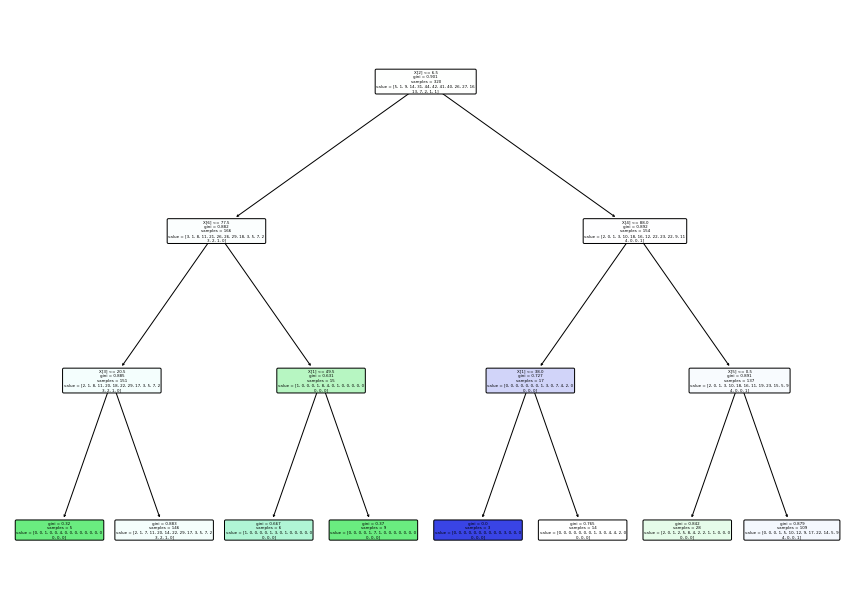

In [17]:
plt.figure(figsize = (15,11))
plot_tree(dt_model, rounded = True, filled = True)
plt.show()

## Model Testing

In [18]:
y_train_pred = dt_model.predict(X_train)

In [19]:
y_test_pred = dt_model.predict(X_test)

## Model Evaluation

In [20]:
accuracy_score(y_train,y_train_pred)  # For Train Data 

0.25

In [21]:
print(confusion_matrix(y_train,y_train_pred))

[[ 0  0  0  0  0  2  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0 11  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0 20  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  1 14  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  3 22  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0 29  0  9  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  1 17  0 17  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  3  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  5  0 14  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  5  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  9  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


In [22]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        31
           5       0.45      0.43      0.44        44
           6       0.50      0.07      0.12        42
           7       0.20      0.71      0.31        41
           8       0.00      0.00      0.00        40
           9       0.20      0.85      0.33        26
          10       0.41      0.26      0.32        27
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy              

C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
accuracy_score(y_test,y_test_pred)

0.1375

In [24]:
confusion_matrix(y_test,y_test_pred)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 9, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 6, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 7, 0, 2, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 5, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [25]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        10
           5       0.12      0.11      0.12         9
           6       0.00      0.00      0.00        12
           7       0.15      0.64      0.25        11
           8       0.00      0.00      0.00        10
           9       0.13      0.33      0.19         9
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         3

    accuracy                           0.14        80
   macro avg       0.03      0.09      0.05        80
weighted avg       0.05      0.14      0.07        80



C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NirajPalve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
